In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
SD = 0.15
TAU = 1 / SD ** 2

class Rating:
    def __init__(self, prior_n=0, prior_mean=0):
        self.mu = prior_mean
        self.n = prior_n
        
        self.history = {
            "match": [],
            "obs": [],
            "mean": [],
            "sd_mean": [],
            "sd_obs": [],
            "sd_total": [],
        }
        
        self.streaks = [0, 0]
        
    def record(self, x = 0):
        self.history["match"].append(len(self.history["match"]))
        self.history["obs"].append(x)
        self.history["mean"].append(self.mean())
        self.history["sd_mean"].append(self.sd_mean())
        self.history["sd_obs"].append(self.sd_obs())
        self.history["sd_total"].append(self.sd_total())

    def add(self, x):
        self.record(x)
        self.mu = (self.mu * self.n + x) / (self.n + 1)
        
        mean, sd = self.mean(), self.sd_total()
        z_score = abs(mean - x) / sd
        if z_score > 1.5:
            self.n -= round(2 * z_score) / 2
            
        self.streaks[0] = self.streaks[0] + 1 if x > mean + sd / 3 else 0
        self.streaks[1] = self.streaks[1] + 1 if x < mean - sd / 3 else 0
        if max(self.streaks) > 2:
            self.n -= max(self.streaks) - 2
        
        self.n = max(1, self.n + 0.5)
        
    def mean(self):
        return self.mu
    
    def sd_mean(self):
        return self.sd_obs() / (self.n) ** 0.5
    
    def sd_obs(self):
        return max(self.mu * SD, 3)
    
    def sd_total(self):
        return (self.sd_mean() ** 2 + self.sd_obs() ** 2) ** 0.5
    
    def __repr__(self):
        return "Rating (" + \
            str(round(self.mean(), 4)) + ", " + \
            str(round(self.sd_mean(), 4)) + ", " + \
            str(round(self.sd_obs(), 4)) + ", " + \
            str(round(self.sd_total(), 4)) + ")"
    
    @staticmethod
    def plot_ratings(ratings):
        fig, ax = plt.subplots(figsize=(9, 6))
        colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
        for color, rating in zip(colors, ratings):
            ax.scatter(rating.history["match"], rating.history["obs"], label="Observations")
            ax.plot(rating.history["match"], rating.history["mean"], label="Bayesian")
            ax.fill_between(
                rating.history["match"], 
                [x - 2 * y for x, y in zip(rating.history["mean"], rating.history["sd_mean"])], 
                [x + 2 * y for x, y in zip(rating.history["mean"], rating.history["sd_mean"])],
                color=color, 
                alpha=0.4, 
                label="Mean CI"
            )

            ax.fill_between(
                rating.history["match"], 
                [x - 2 * y for x, y in zip(rating.history["mean"], rating.history["sd_total"])], 
                [x + 2 * y for x, y in zip(rating.history["mean"], rating.history["sd_total"])],
                color=color, 
                alpha=0.2, 
                label="Obs CI"
            )
        ax.legend()
        ax.grid()
        fig.show()

In [3]:
data_254 = [60.96384213759518,
 64.84559836106267,
 65.03518363923266,
 80.4343694151691,
 66.80600056053923,
 63.38406526906757,
 63.23389575566313,
 73.32089031091166,
 87.4850498050558,
 78.3168663303721,
 80.63513734229292,
 85.61799777449393,
 82.80059307688381,
 67.82726173935117,
 71.88216535868101,
 85.93417407491157,
 68.469041866272,
 62.484184960200324,
 79.45715844522017,
 69.87380633113071,
 61.84953144634744,
 70.16437859996725,
 64.10133953640953,
 79.51536754900391,
 58.15178060475402,
 57.606567945816266,
 62.033018685354136,
 68.0735851014152,
 73.8581777238871,
 74.17750329934415]

data_1678 = [43.821723341036645,
 63.32483072048805,
 57.05241730456529,
 44.098682492053335,
 59.49410554248762,
 76.66710841685033,
 76.52314740369091,
 68.33697283466074,
 70.95973006107815,
 55.67855308600823,
 60.52835160039135,
 60.4765204169217,
 36.76828936094462,
 83.32183307384979,
 65.51227059809216,
 86.83362982230332,
 85.41848012254216,
 67.82848026473366,
 47.18227933682553,
 92.41807726065312,
 90.17151173135977,
 32.22305047934991,
 50.7686188679509,
 49.77348830807907,
 76.04736501764525,
 72.46171396044664,
 83.20797054162182,
 78.02653284803647,
 87.35388911996857,
 64.53595387376465,
 77.08367785804373,
 82.87092643457466,
 103.82974999443995,
 65.89079451448593,
 93.27567248023047,
 96.53314736022637,
 91.37793053551098,
 71.95756124843658,
 88.28273047034249,
 76.54264945091373,
 89.78733756891404,
 47.62723461816372]

data_5511 = [2.840359364201797,
 0.7652238103823632,
 0.8044426406209086,
 8.209657122049778,
 2.198030234573722,
 3.0216514457369685,
 4.247364278155358,
 7.473531425439338,
 10.626120924297439,
 4.377533650304059,
 3.4852075925180404,
 4.927696002456704,
 9.256145189910352,
 7.5339448607186235,
 6.227089621486564,
 14.785388227585628,
 7.428077134932554,
 11.240988425830553,
 12.640730907399327,
 13.07236075812272,
 11.137644437498176,
 16.951248752093445,
 11.166955222914353,
 18.59835939757349,
 15.599426426534059,
 16.24720095281364,
 21.188454587395096,
 17.33767455308303,
 18.646159015971183,
 20.116491814117172,
 17.85054102435983,
 16.185682768766053,
 18.3697622003525,
 20.67782112684474,
 22.45856234100086,
 27.378322259816205]

data_1577 = [30.60294687863513,
 35.26261411674019,
 36.02690416655162,
 41.42548485368972,
 43.27098399264202,
 2.9860491269116163,
 17.127521963378467,
 8.191920165400983,
 21.642946380631077,
 10.811869432277653,
 17.045114641000776,
 28.298945001517602,
 23.893861509728783,
 36.21357297506459,
 40.58356350794612,
 22.060177176487237,
 54.023696478017165,
 58.25189610799332,
 61.74733880632057,
 51.8297816699171,
 60.187861460085266,
 55.0559749349798,
 46.920670587098435,
 56.19345104863533,
 65.0928224141626,
 66.19462741576173,
 65.69896449975468,
 75.65097328174582,
 56.75315158054459,
 70.4404130278389,
 69.39926365762523,
 50.0662470712328,
 78.13489590658004,
 73.60666123297004,
 65.9970361392119,
 83.69890895208438,
 73.0458089342613,
 50.73546003762103,
 66.40008816141345,
 53.95425028425988,
 72.98776635818896,
 71.53922622168741,
 85.03531167875548,
 48.549830505618786,
 72.86219596701956,
 58.87592347361828,
 58.87592347361828]

In [4]:
r = Rating(prior_n=1, prior_mean=40)

print(r)
for o in data_1577:
    r.add(o)
print(r)

r2 = Rating(prior_n=1, prior_mean=60)
print(r2)
for o in data_1678:
    r2.add(o)
print(r2)

Rating (40, 6.0, 6.0, 8.4853)
Rating (65.3667, 3.4666, 9.805, 10.3998)
Rating (60, 9.0, 9.0, 12.7279)
Rating (78.978, 5.298, 11.8467, 12.9774)


<IPython.core.display.Javascript object>


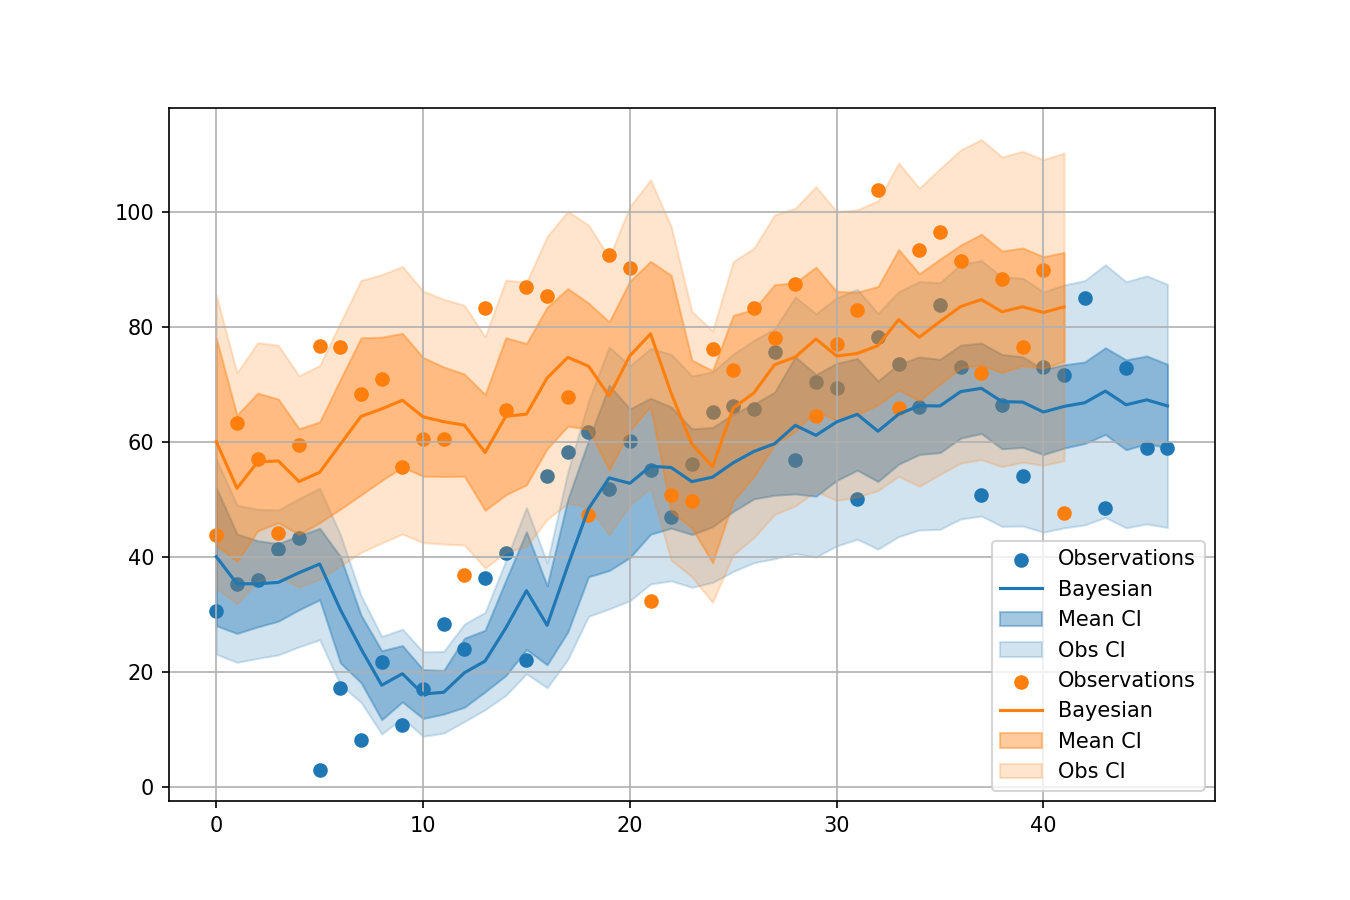

In [5]:
Rating.plot_ratings([r, r2])